In [37]:
# importing packages as aliases
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [38]:
# Load datasets
customers_df = pd.read_csv('customers_final.csv')
engagement_df = pd.read_csv('engagements_final.csv')
marketing_df = pd.read_csv('marketing_final.csv')
transactions_df = pd.read_csv('transactions_final.csv')

### Data Preparation, Cleaning, Exploratory Data Analysis

In [39]:
# Display the first few rows of each dataset
print("Customers Data:")
print(customers_df.head(), "\n")

print("Engagement Data:")
print(engagement_df.head(), "\n")

print("Marketing Data:")
print(marketing_df.head(), "\n")

print("Transactions Data:")
print(transactions_df.head(), "\n")

Customers Data:
   customer_id   join_date last_purchase_date   age  gender           location
0            1  2023-11-20         2024-03-17  56.0  Female  North Shannonbury
1            2  2021-09-08         2023-10-25   NaN    Male          Hillville
2            3  2021-06-01         2022-11-27   NaN     NaN   North Latoyatown
3            4  2022-01-01         2022-09-01  29.0    Male          Grossstad
4            5  2022-01-24         2023-06-02   NaN    Male   East Matthewfort 

Engagement Data:
   customer_id  number_of_site_visits  number_of_emails_opened  \
0            1                     10                       15   
1            2                    285                       49   
2            3                    192                       73   
3            4                    110                       30   
4            5                    161                        2   

   number_of_clicks  
0                 1  
1                51  
2                25  
3     

In [40]:
# Summary of the structure of each dataset
print("Customers Data:")
print(customers_df.info(), "\n")

print("Engagement Data:")
print(engagement_df.info(), "\n")

print("Marketing Data:")
print(marketing_df.info(), "\n")

print("Transactions Data:")
print(transactions_df.info(), "\n")

Customers Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 8991 non-null   float64
 4   gender              9467 non-null   object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB
None 

Engagement Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   customer_id              10000 non-null  int64
 1   number_of_site_visits    10000 non-null  int64
 2   number_of_emails_opened  10000 non-null  int64
 3   number_of_clicks         

In [41]:
# we see that there are 1,009 missing ages and 533 missing genders. As this is a significant number
# of rows (out of 10000 total rows), dropping these rows might cause significant data loss
# Therefore it is recommended to imputate with mean/median/mode

In [42]:
# For gender, mode is sufficient for imputation as it is categorical
# calculating skewness to determine which measure of central tendency to use to imputate for age
age_skewness = customers_df['age'].skew()
print(age_skewness)
print(customers_df['age'].mean())
print(customers_df['age'].median())

-0.0007142573102785624
43.467467467467465
44.0


In [43]:
# skewness is very low, thus mean and median are very close. Either will suffice - we're going ahead with median
# Cleaning data- imputation

# Impute missing values in the age column with the median age
median_age = customers_df['age'].median()
customers_df['age'].fillna(median_age, inplace=True)

# Impute missing values in the gender column with the mode (most common gender)
mode_gender = customers_df['gender'].mode()[0]
customers_df['gender'].fillna(mode_gender, inplace=True)

# Verify the imputation
missing_age_count_after = customers_df['age'].isna().sum()
missing_gender_count_after = customers_df['gender'].isna().sum()

print("Missing values in age column after imputation:", missing_age_count_after)
print("Missing values in gender column after imputation:", missing_gender_count_after)

Missing values in age column after imputation: 0
Missing values in gender column after imputation: 0


/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_18902/2292395155.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  customers_df['age'].fillna(median_age, inplace=True)
/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_18902/2292395155.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [44]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         10000 non-null  int64  
 1   join_date           10000 non-null  object 
 2   last_purchase_date  10000 non-null  object 
 3   age                 10000 non-null  float64
 4   gender              10000 non-null  object 
 5   location            10000 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 468.9+ KB


In [45]:
# join at customer level with # of marketing campaigns customer responded YES to
# Aggregate marketing data at a customer level
marketing_agg = marketing_df[marketing_df['response'] == 'Yes'].groupby('customer_id')['campaign_id'].count().to_frame()
marketing_agg.rename(columns={'campaign_id': 'campaigns_responded_yes'}, inplace=True)

# Aggregate transaction data at a customer level
transactions_agg = transactions_df.groupby('customer_id').aggregate({'transaction_id': 'count', 'transaction_amount': 'sum'})
transactions_agg.rename(columns={'transaction_id': 'transaction_count', 'transaction_amount': 'total_spent'}, inplace=True)

# Set customers and engagement index as customer_id
customers_df.set_index('customer_id', inplace=True)
engagement_df.set_index('customer_id', inplace=True)

# Join all tables
joint_data = customers_df.join(engagement_df).join(transactions_agg).join(marketing_agg)
joint_data.fillna(0, inplace=True)  # Fill missing values with 0 for customers with no transactions or marketing responses

joint_data


,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_spent,campaigns_responded_yes
customer_id,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10,15,1,6,3509.48,1.0
2,2021-09-08,2023-10-25,44.0,Male,Hillville,285,49,51,9,6081.32,2.0
3,2021-06-01,2022-11-27,44.0,Male,North Latoyatown,192,73,25,6,1454.87,1.0
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110,30,17,20,7874.68,1.0
5,2022-01-24,2023-06-02,44.0,Male,East Matthewfort,161,2,7,24,15524.55,0.0
...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119,47,16,10,5498.20,0.0
9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3,33,14,12,5848.30,1.0
9998,2023-09-17,2024-01-30,39.0,Male,New John,53,17,5,3,3503.13,1.0


In [46]:
joint_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   join_date                10000 non-null  object 
 1   last_purchase_date       10000 non-null  object 
 2   age                      10000 non-null  float64
 3   gender                   10000 non-null  object 
 4   location                 10000 non-null  object 
 5   number_of_site_visits    10000 non-null  int64  
 6   number_of_emails_opened  10000 non-null  int64  
 7   number_of_clicks         10000 non-null  int64  
 8   transaction_count        10000 non-null  int64  
 9   total_spent              10000 non-null  float64
 10  campaigns_responded_yes  10000 non-null  float64
dtypes: float64(3), int64(4), object(4)
memory usage: 937.5+ KB


In [47]:
# showing summary statistics of joined data
joint_data.describe()

,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_spent,campaigns_responded_yes
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,43.521200,100.111900,39.862100,19.725300,12.954500,7737.562981,1.257800
std,14.313443,118.625052,46.511719,22.975083,7.191203,4628.799469,0.971511
min,18.000000,1.000000,1.000000,1.000000,1.000000,23.810000,0.000000
25%,32.000000,15.000000,6.000000,3.000000,7.000000,3839.915000,1.000000
50%,44.000000,53.000000,22.000000,11.000000,13.000000,7498.890000,1.000000
75%,55.000000,141.000000,57.000000,28.000000,19.000000,11275.797500,2.000000
max,69.000000,711.000000,303.000000,142.000000,25.000000,24298.220000,4.000000


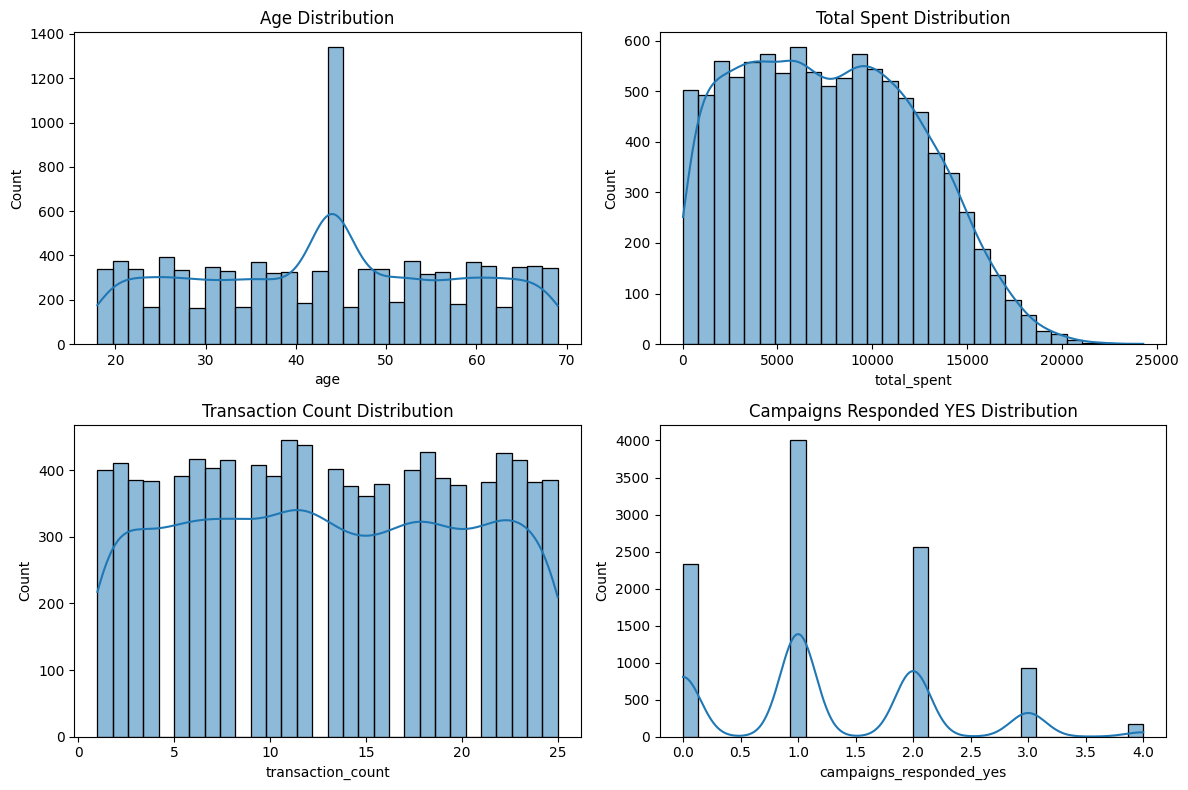

In [48]:
# Plotting distributions
plt.figure(figsize=(12, 8))

# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(joint_data['age'], kde=True, bins=30)
plt.title('Age Distribution')

# Total spent distribution
plt.subplot(2, 2, 2)
sns.histplot(joint_data['total_spent'], kde=True, bins=30)
plt.title('Total Spent Distribution')

# Transaction count distribution
plt.subplot(2, 2, 3)
sns.histplot(joint_data['transaction_count'], kde=True, bins=30)
plt.title('Transaction Count Distribution')

# Campaigns responded YES distribution
plt.subplot(2, 2, 4)
sns.histplot(joint_data['campaigns_responded_yes'], kde=True, bins=30)
plt.title('Campaigns Responded YES Distribution')

plt.tight_layout()
plt.show()

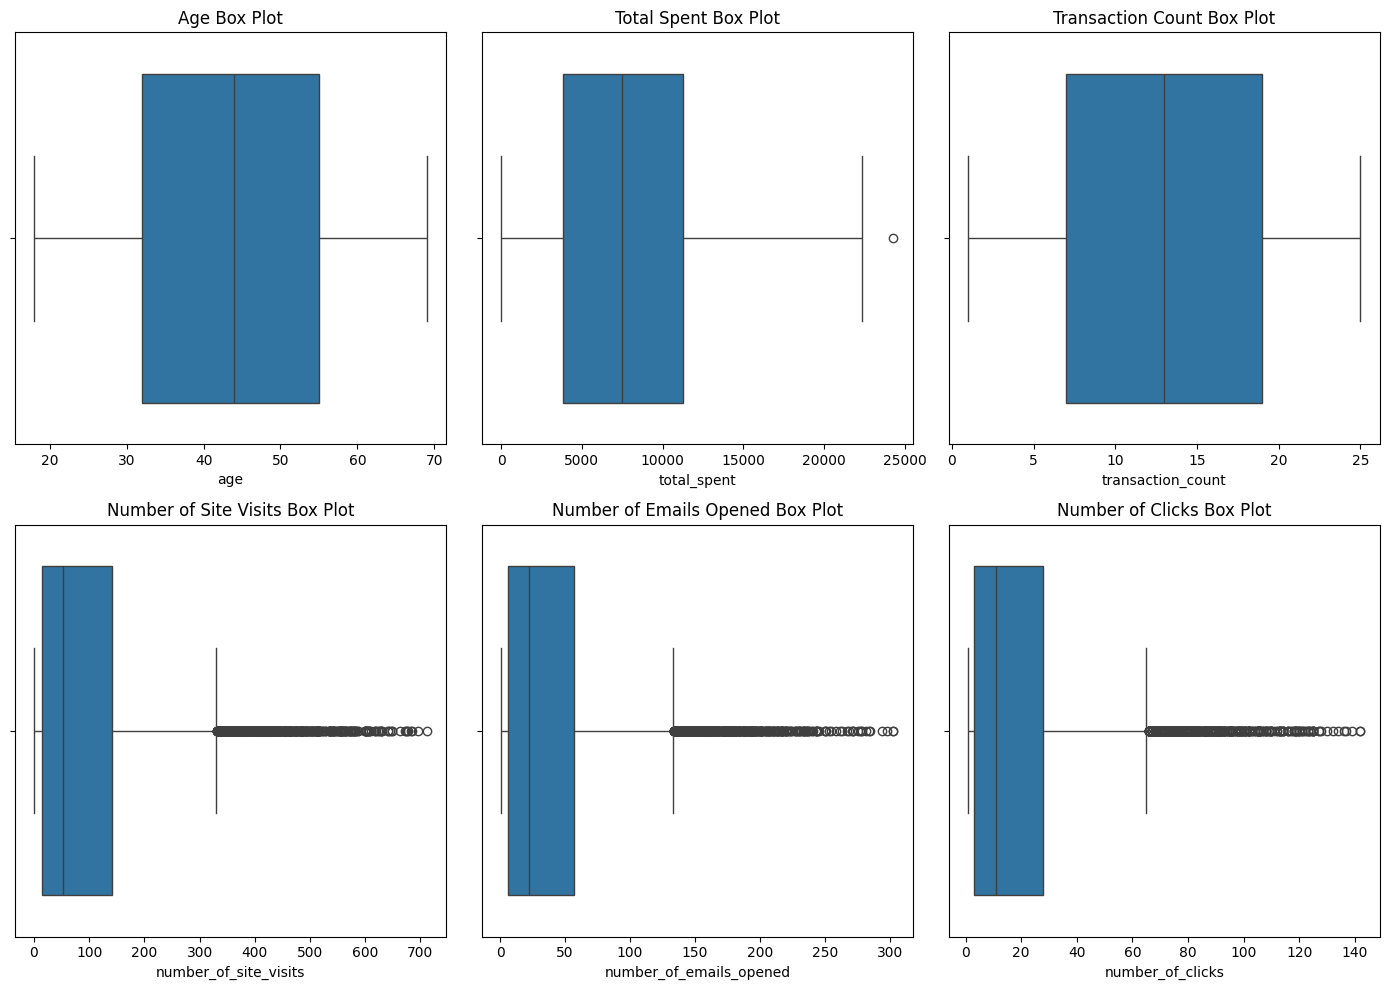

In [49]:
# Create box plots to identify outliers
plt.figure(figsize=(14, 10))

# Age box plot
plt.subplot(2, 3, 1)
sns.boxplot(x=joint_data['age'])
plt.title('Age Box Plot')

# Total spent box plot
plt.subplot(2, 3, 2)
sns.boxplot(x=joint_data['total_spent'])
plt.title('Total Spent Box Plot')

# Transaction count box plot
plt.subplot(2, 3, 3)
sns.boxplot(x=joint_data['transaction_count'])
plt.title('Transaction Count Box Plot')

# Number of site visits box plot
plt.subplot(2, 3, 4)
sns.boxplot(x=joint_data['number_of_site_visits'])
plt.title('Number of Site Visits Box Plot')

# Number of emails opened box plot
plt.subplot(2, 3, 5)
sns.boxplot(x=joint_data['number_of_emails_opened'])
plt.title('Number of Emails Opened Box Plot')

# Number of clicks box plot
plt.subplot(2, 3, 6)
sns.boxplot(x=joint_data['number_of_clicks'])
plt.title('Number of Clicks Box Plot')

plt.tight_layout()
plt.show()


In [50]:
joint_data[joint_data ['total_spent']>22000].describe()

,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_spent,campaigns_responded_yes
count,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
mean,32.500000,39.750000,36.500000,9.500000,24.000000,22776.457500,0.750000
std,8.660254,42.975768,61.776479,9.949874,0.816497,1021.356233,0.957427
min,25.000000,6.000000,1.000000,1.000000,23.000000,22102.830000,0.000000
25%,28.750000,10.500000,4.750000,1.000000,23.750000,22280.752500,0.000000
50%,30.000000,26.500000,8.000000,8.500000,24.000000,22352.390000,0.500000
75%,33.750000,55.750000,39.750000,17.000000,24.250000,22848.095000,1.250000
max,45.000000,100.000000,129.000000,20.000000,25.000000,24298.220000,2.000000


In [51]:
joint_data[joint_data ['number_of_site_visits']>340].describe()

,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_spent,campaigns_responded_yes
count,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000,584.000000
mean,43.034247,443.914384,105.893836,52.147260,12.559932,7529.622962,1.282534
std,13.917998,80.458546,65.813206,32.096481,7.509845,4814.790804,0.990852
min,18.000000,341.000000,1.000000,1.000000,1.000000,29.920000,0.000000
25%,31.750000,377.000000,50.000000,25.750000,6.000000,3330.612500,1.000000
50%,44.000000,426.000000,99.500000,50.000000,12.000000,7010.235000,1.000000
75%,53.000000,490.000000,152.000000,76.000000,19.000000,11370.750000,2.000000
max,69.000000,711.000000,303.000000,142.000000,25.000000,19875.940000,4.000000


In [52]:
joint_data[joint_data ['number_of_emails_opened']>130].describe()

,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_spent,campaigns_responded_yes
count,601.000000,601.000000,601.000000,601.00000,601.000000,601.000000,601.000000
mean,43.459235,271.004992,172.049917,53.52579,12.885191,7789.130932,1.198003
std,14.264481,163.956605,35.244870,32.08265,7.366713,4760.255052,0.939359
min,18.000000,1.000000,131.000000,1.00000,1.000000,29.110000,0.000000
25%,32.000000,133.000000,145.000000,28.00000,6.000000,3830.950000,1.000000
50%,44.000000,269.000000,164.000000,52.00000,13.000000,7458.260000,1.000000
75%,55.000000,395.000000,190.000000,74.00000,19.000000,11498.060000,2.000000
max,69.000000,684.000000,303.000000,142.00000,25.000000,19814.040000,4.000000


In [53]:
joint_data[joint_data ['number_of_clicks']>65].describe()

,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_spent,campaigns_responded_yes
count,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000,591.000000
mean,43.052453,265.436548,104.064298,85.367174,12.468697,7426.621371,1.219966
std,13.887281,166.559061,65.547674,16.431539,7.109932,4582.146832,0.971984
min,18.000000,1.000000,1.000000,66.000000,1.000000,23.810000,0.000000
25%,32.000000,120.000000,51.500000,72.000000,7.000000,3564.460000,0.000000
50%,44.000000,259.000000,98.000000,81.000000,12.000000,7007.460000,1.000000
75%,53.000000,388.000000,152.500000,95.000000,19.000000,10865.680000,2.000000
max,69.000000,695.000000,303.000000,142.000000,25.000000,19080.300000,4.000000


In [54]:
# Capping outliers 

def cap_outliers(df, columns):
    for column in columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        upper_limit = Q3 + 1.5 * IQR
        df[column] = df[column].apply(lambda x: min(x, upper_limit))
    return df

columns_to_cap = ['number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks', 'total_spent']
joint_data_capped = cap_outliers(joint_data, columns_to_cap)


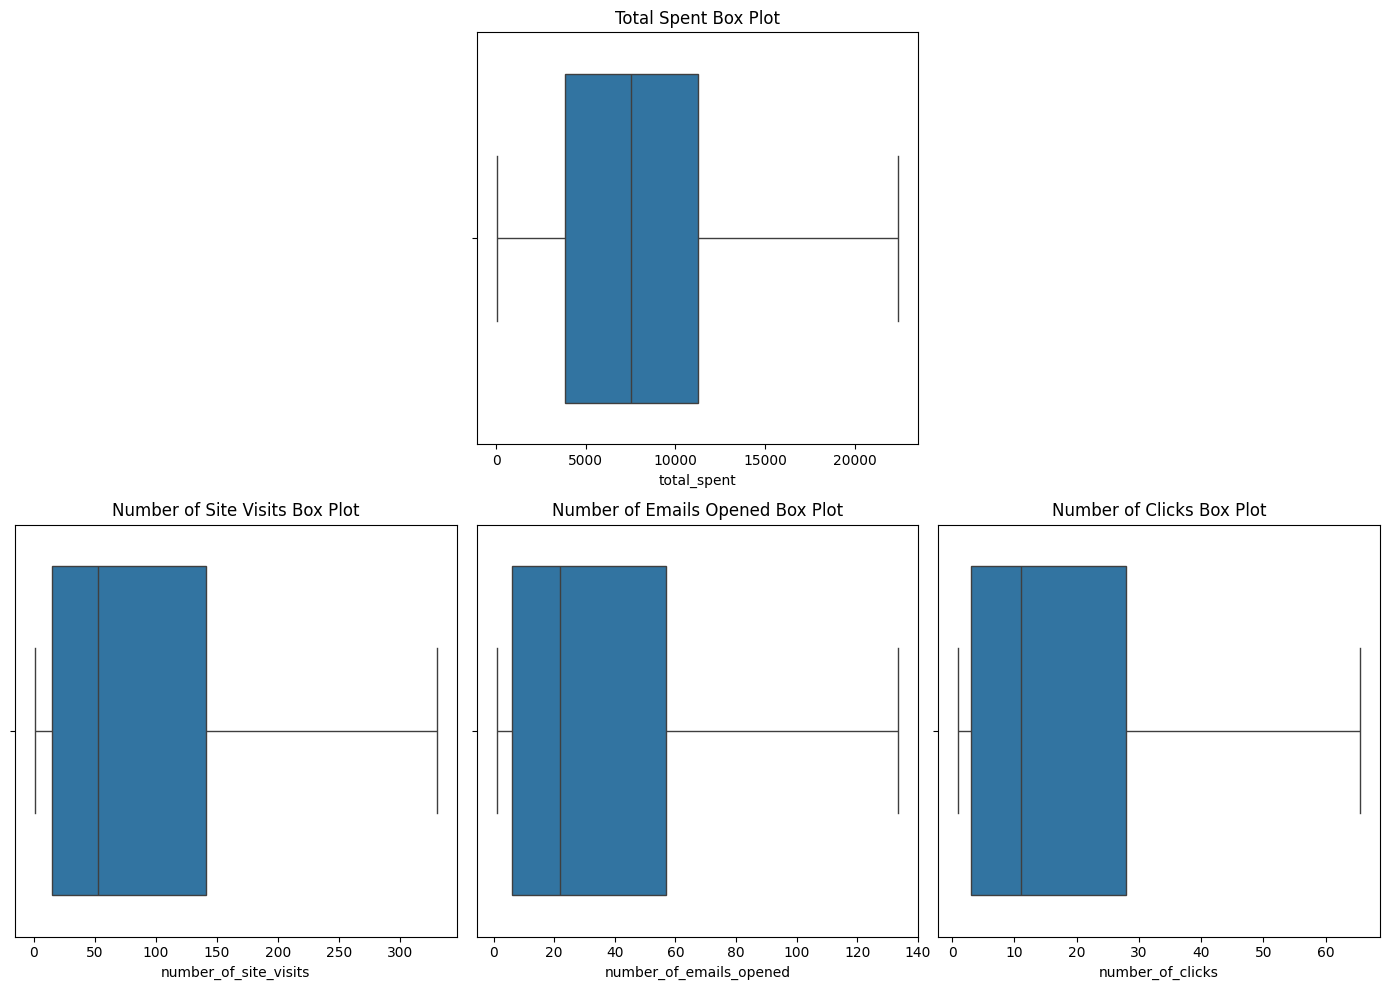

In [55]:
# Checking boxplots after capping outliers 
plt.figure(figsize=(14, 10))

# Total spent box plot
plt.subplot(2, 3, 2)
sns.boxplot(x=joint_data_capped['total_spent'])
plt.title('Total Spent Box Plot')

# Number of site visits box plot
plt.subplot(2, 3, 4)
sns.boxplot(x=joint_data_capped['number_of_site_visits'])
plt.title('Number of Site Visits Box Plot')

# Number of emails opened box plot
plt.subplot(2, 3, 5)
sns.boxplot(x=joint_data_capped['number_of_emails_opened'])
plt.title('Number of Emails Opened Box Plot')

# Number of clicks box plot
plt.subplot(2, 3, 6)
sns.boxplot(x=joint_data_capped['number_of_clicks'])
plt.title('Number of Clicks Box Plot')

plt.tight_layout()
plt.show()

### Feature Engineering

In [56]:
# feature engineering
# Convert date columns to datetime format
joint_data_capped['last_purchase_date'] = pd.to_datetime(joint_data_capped['last_purchase_date'])
joint_data_capped['join_date'] = pd.to_datetime(joint_data_capped['join_date'])

# Calculate customer age in days
joint_data_capped['customer_age_days'] = (joint_data_capped['last_purchase_date'] - joint_data_capped['join_date']).dt.days

# Convert age in days to years
joint_data_capped['customer_age_years'] = joint_data_capped['customer_age_days'] / 365

# drop the temporary 'customer_age_days' column
joint_data_capped.drop(columns=['customer_age_days'], inplace=True)

# Display the table with added feature
joint_data_capped

,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_spent,campaigns_responded_yes,customer_age_years
customer_id,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10.0,15.0,1.0,6,3509.48,1.0,0.323288
2,2021-09-08,2023-10-25,44.0,Male,Hillville,285.0,49.0,51.0,9,6081.32,2.0,2.128767
3,2021-06-01,2022-11-27,44.0,Male,North Latoyatown,192.0,73.0,25.0,6,1454.87,1.0,1.490411
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110.0,30.0,17.0,20,7874.68,1.0,0.665753
5,2022-01-24,2023-06-02,44.0,Male,East Matthewfort,161.0,2.0,7.0,24,15524.55,0.0,1.353425
...,...,...,...,...,...,...,...,...,...,...,...,...
9996,2022-12-16,2023-08-13,42.0,Female,Johnstonborough,119.0,47.0,16.0,10,5498.20,0.0,0.657534
9997,2022-07-09,2023-01-25,26.0,Male,Jessicamouth,3.0,33.0,14.0,12,5848.30,1.0,0.547945
9998,2023-09-17,2024-01-30,39.0,Male,New John,53.0,17.0,5.0,3,3503.13,1.0,0.369863


In [57]:
joint_data_capped.describe()


,join_date,last_purchase_date,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_spent,campaigns_responded_yes,customer_age_years
count,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,2022-03-19 09:28:13.439999744,2023-04-25 18:26:12.480000,43.521200,93.440900,37.538250,18.551150,12.954500,7737.376121,1.257800,1.102393
min,2020-01-01 00:00:00,2020-01-26 00:00:00,18.000000,1.000000,1.000000,1.000000,1.000000,23.810000,0.000000,0.000000
25%,2021-02-15 00:00:00,2022-09-19 00:00:00,32.000000,15.000000,6.000000,3.000000,7.000000,3839.915000,1.000000,0.295890
50%,2022-03-19 00:00:00,2023-08-04 00:00:00,44.000000,53.000000,22.000000,11.000000,13.000000,7498.890000,1.000000,0.821918
75%,2023-04-28 00:00:00,2024-02-11 00:00:00,55.000000,141.000000,57.000000,28.000000,19.000000,11275.797500,2.000000,1.693151
max,2024-05-31 00:00:00,2024-05-31 00:00:00,69.000000,330.000000,133.500000,65.500000,25.000000,22429.621250,4.000000,4.336986
std,NaN,NaN,14.313443,99.118406,39.482228,19.486187,7.191203,4628.168539,0.971511,0.974601


In [58]:
# Convert transaction_date to datetime
transactions_df['transaction_date'] = pd.to_datetime(transactions_df['transaction_date'])
customers_df['join_date'] = pd.to_datetime(customers_df['join_date'])

# Calculate the day 30 and day 360 spend
def calculate_day_spend(transactions_df, join_dates, days):
    day_spend = transactions_df.merge(join_dates, on='customer_id')
    day_spend = day_spend[(day_spend['transaction_date'] - day_spend['join_date']).dt.days <= days]
    day_spend = day_spend.groupby('customer_id')['transaction_amount'].sum().to_frame()
    day_spend.rename(columns={'transaction_amount': f'day_{days}_spend'}, inplace=True)
    return day_spend

# Create a DataFrame with customer_id and join_date
customer_join_dates = customers_df[['join_date']].reset_index()

# Calculate day 30 and day 360 spend
day_30_spend = calculate_day_spend(transactions_df, customer_join_dates, 30)
day_360_spend = calculate_day_spend(transactions_df, customer_join_dates, 360)

# Join these features with joint_data
joint_data_capped = joint_data_capped.join(day_30_spend)
joint_data_capped = joint_data_capped.join(day_360_spend)

# Fill any missing values with 0 (if a customer has no spend in the first 30 or 360 days)
joint_data_capped.fillna(0, inplace=True)

# Display the first few rows of the updated joint_data
print("Updated Joint Data with Day 30 and Day 360 Spend:")
joint_data_capped.head()


Updated Joint Data with Day 30 and Day 360 Spend:


,join_date,last_purchase_date,age,gender,location,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_spent,campaigns_responded_yes,customer_age_years,day_30_spend,day_360_spend
customer_id,,,,,,,,,,,,,,
1,2023-11-20,2024-03-17,56.0,Female,North Shannonbury,10.0,15.0,1.0,6,3509.48,1.0,0.323288,0.00,3509.48
2,2021-09-08,2023-10-25,44.0,Male,Hillville,285.0,49.0,51.0,9,6081.32,2.0,2.128767,1866.56,4021.40
3,2021-06-01,2022-11-27,44.0,Male,North Latoyatown,192.0,73.0,25.0,6,1454.87,1.0,1.490411,0.00,501.00
4,2022-01-01,2022-09-01,29.0,Male,Grossstad,110.0,30.0,17.0,20,7874.68,1.0,0.665753,154.63,7874.68
5,2022-01-24,2023-06-02,44.0,Male,East Matthewfort,161.0,2.0,7.0,24,15524.55,0.0,1.353425,0.00,14305.55


In [59]:
# Calculate the day 30 transactions
def calculate_day_30_transactions(transactions_df, join_dates, days):
    transactions_within_days = transactions_df.merge(join_dates, on='customer_id')
    transactions_within_days = transactions_within_days[(transactions_within_days['transaction_date'] - transactions_within_days['join_date']).dt.days <= days]
    day_30_transactions = transactions_within_days.groupby('customer_id')['transaction_id'].count().to_frame()
    day_30_transactions.rename(columns={'transaction_id': f'day_{days}_transactions'}, inplace=True)
    return day_30_transactions

# Create a DataFrame with customer_id and join_date
customer_join_dates = customers_df[['join_date']].reset_index()

# Calculate day 30 transactions
day_30_transactions = calculate_day_30_transactions(transactions_df, customer_join_dates, 30)

# Join day_30_transactions with joint_data_capped
joint_data_capped = joint_data_capped.join(day_30_transactions)

# Fill any missing values with 0 (if a customer has no transactions in the first 30 days)
joint_data_capped.fillna(0, inplace=True)


In [60]:
# Checking for null values in target variable
joint_data_capped[joint_data_capped['day_360_spend']<1].describe()


,join_date,last_purchase_date,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_spent,campaigns_responded_yes,customer_age_years,day_30_spend,day_360_spend,day_30_transactions
count,190,190,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.000000,190.0,190.0,190.0
mean,2020-12-16 05:10:44.210526208,2023-08-24 19:04:25.263158016,43.752632,223.063158,85.239474,40.989474,2.636842,1639.998105,1.247368,2.689257,0.0,0.0,0.0
min,2020-01-01 00:00:00,2021-08-18 00:00:00,18.000000,6.000000,1.000000,1.000000,1.000000,23.810000,0.000000,1.271233,0.0,0.0,0.0
25%,2020-05-22 06:00:00,2023-03-20 18:00:00,31.000000,135.250000,42.250000,22.250000,1.000000,455.012500,1.000000,2.113699,0.0,0.0,0.0
50%,2020-10-29 12:00:00,2023-10-17 00:00:00,44.000000,250.000000,95.000000,43.000000,2.000000,1217.450000,1.000000,2.626027,0.0,0.0,0.0
75%,2021-05-27 12:00:00,2024-02-27 18:00:00,56.000000,330.000000,133.500000,65.375000,3.000000,2193.395000,2.000000,3.277397,0.0,0.0,0.0
max,2022-10-26 00:00:00,2024-05-30 00:00:00,69.000000,330.000000,133.500000,65.500000,15.000000,8259.820000,4.000000,4.336986,0.0,0.0,0.0
std,NaN,NaN,14.575360,109.385229,44.400317,20.827076,2.281675,1576.226424,0.990360,0.754217,0.0,0.0,0.0


In [61]:
# Removing null values from target
final_data = joint_data_capped[joint_data_capped['day_360_spend'] != 0]


In [62]:
final_data['day_360_spend'].describe()

count     9810.000000
mean      6396.494094
std       4408.422579
min         10.450000
25%       2757.212500
50%       5641.315000
75%       9495.985000
max      24298.220000
Name: day_360_spend, dtype: float64

In [63]:
final_data.columns

Index(['join_date', 'last_purchase_date', 'age', 'gender', 'location',
       'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks',
       'transaction_count', 'total_spent', 'campaigns_responded_yes',
       'customer_age_years', 'day_30_spend', 'day_360_spend',
       'day_30_transactions'],
      dtype='object')

In [64]:
final_data.describe()

,join_date,last_purchase_date,age,number_of_site_visits,number_of_emails_opened,number_of_clicks,transaction_count,total_spent,campaigns_responded_yes,customer_age_years,day_30_spend,day_360_spend,day_30_transactions
count,9810,9810,9810.000000,9810.000000,9810.000000,9810.000000,9810.000000,9810.000000,9810.000000,9810.000000,9810.000000,9810.000000,9810.000000
mean,2022-03-28 06:26:47.339449600,2023-04-23 10:10:47.339449344,43.516718,90.930377,36.614373,18.116565,13.154332,7855.470089,1.258002,1.071659,1956.600460,6396.494094,3.273496
min,2020-01-01 00:00:00,2020-01-26 00:00:00,18.000000,1.000000,1.000000,1.000000,1.000000,33.340000,0.000000,0.000000,0.000000,10.450000,0.000000
25%,2021-02-26 00:00:00,2022-09-15 00:00:00,32.000000,15.000000,6.000000,3.000000,7.000000,4052.315000,1.000000,0.290411,0.000000,2757.212500,0.000000
50%,2022-04-05 00:00:00,2023-08-02 00:00:00,44.000000,52.000000,21.000000,10.000000,13.000000,7650.260000,1.000000,0.798630,696.000000,5641.315000,1.000000
75%,2023-05-06 00:00:00,2024-02-11 00:00:00,55.000000,136.000000,55.000000,27.000000,19.000000,11345.450000,2.000000,1.635616,2331.462500,9495.985000,4.000000
max,2024-05-31 00:00:00,2024-05-31 00:00:00,69.000000,330.000000,133.500000,65.500000,25.000000,22429.621250,4.000000,4.328767,22364.720000,24298.220000,25.000000
std,NaN,NaN,14.309042,97.223749,38.808867,19.203318,7.107238,4588.343039,0.971193,0.952662,3111.076238,4408.422579,4.991778


In [65]:
final_data['total_spent'].median()

7650.26

### Evaluating Predictive Models

In [66]:
pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [67]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import PrecisionRecallDisplay, RocCurveDisplay, mean_squared_error

In [69]:
# Define features and target
features = ['join_date', 'last_purchase_date', 'age', 'gender', 'location',
            'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks',
            'day_30_transactions', 'campaigns_responded_yes', 'customer_age_years', 'day_30_spend']
target = 'day_360_spend'

# Select the feature columns and target column
X = final_data[features]
y = final_data[target]


In [70]:
# Extract year, month, and day as features from date columns
X['join_year'] = X['join_date'].dt.year
X['join_month'] = X['join_date'].dt.month
X['join_day'] = X['join_date'].dt.day
X['last_transaction_year'] = X['last_purchase_date'].dt.year
X['last_transaction_month'] = X['last_purchase_date'].dt.month
X['last_transaction_day'] = X['last_purchase_date'].dt.day

# Drop the original datetime columns
X.drop(columns=['join_date', 'last_purchase_date'], inplace=True)

# Create pre-processing pipeline to scale numeric columns and encode categoricals
preprocessor = ColumnTransformer(
    transformers=[
        ('num', MinMaxScaler(), ['age', 'number_of_site_visits', 'number_of_emails_opened', 'number_of_clicks',
                                   'day_30_transactions', 'customer_age_years', 'day_30_spend']),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['gender', 'location', 'join_year', 'join_month', 'join_day',
                                  'last_transaction_year', 'last_transaction_month', 'last_transaction_day'])
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_18902/3597699796.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['join_year'] = X['join_date'].dt.year
/var/folders/52/cmc9jvbj6jv3v0r6cng57vd00000gn/T/ipykernel_18902/3597699796.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['join_month'] = X['join_date'].dt.month


In [71]:
                # Define models
                models = {
                    "Linear Regression": LinearRegression(),
                    "Random Forest": RandomForestRegressor(random_state=42),
                    "XGBoost": XGBRegressor(random_state=42)
                }

                # Initialize lists to store results
                model_names = []
                rmse_scores = []

                # Evaluate each model using cross-validation
                for name, model in models.items():
                    # Create a pipeline with preprocessing and model
                    pipeline = Pipeline(steps=[
                        ('preprocessor', preprocessor),
                        ('model', model)
                    ])
                    
                    # Perform cross-validation for RMSE
                    cv_mse_scores = cross_val_score(pipeline, X, y, cv=5, scoring='neg_mean_squared_error')

                    
                    # Calculate mean and standard deviation of RMSE
                    rmse = np.sqrt(-cv_mse_scores)
                    mean_rmse = rmse.mean()
                    std_rmse = rmse.std()
                    
                    # Store results                                             
                    model_names.append(name)
                    rmse_scores.append(mean_rmse)
                    
                    print(f"{name} - RMSE: {mean_rmse:.4f} (std: {std_rmse:.4f})")

                # Display the results in a DataFrame
                results = pd.DataFrame({
                    "Model": model_names,
                    "RMSE": rmse_scores
                })

                print("\nCross-Validation Results:")
                print(results)

Linear Regression - RMSE: 4051.4253 (std: 14.7315)
Random Forest - RMSE: 2942.7869 (std: 55.7534)
XGBoost - RMSE: 2911.1917 (std: 43.7581)

Cross-Validation Results:
               Model         RMSE
0  Linear Regression  4051.425300
1      Random Forest  2942.786863
2            XGBoost  2911.191708


### Evaluation Results
* Linear Regression: RMSE: 4051.43
The high RMSE indicate that Linear Regression does not capture the complexity of the data well, making it less suitable for this task.
* Random Forest Regressor: RMSE: 2942.41
Random Forest significantly improves the RMSE, indicating better predictive performance and the ability to capture non-linear relationships.
* XGBoost Regressor: RMSE: 2911.19
XGBoost outperforms both Linear Regression and Random Forest, achieving the lowest RMSE. This makes it the best-performing model among the three.


### Hyperparamater Tuning

In [72]:

from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__max_depth': [3, 6, 9],
    'model__subsample': [0.6, 0.8, 1.0],
    'model__colsample_bytree': [0.6, 0.8, 1.0]
}

# Create a pipeline with preprocessing and model
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(random_state=42))
])

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=3,
                           scoring='neg_mean_squared_error', n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X, y)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = np.sqrt(-grid_search.best_score_)

print("Best Parameters:", best_params)
print("Best RMSE (Cross-Validation):", best_score)


Fitting 3 folds for each of 243 candidates, totalling 729 fits
[CV] END model__colsample_bytree=0.6, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.6; total time=   0.6s
[CV] END model__colsample_bytree=0.6, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.6; total time=   0.6s
[CV] END model__colsample_bytree=0.6, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.6; total time=   0.6s
[CV] END model__colsample_bytree=0.6, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.7s
[CV] END model__colsample_bytree=0.6, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=1.0; total time=   0.7s
[CV] END model__colsample_bytree=0.6, model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100, model__subsample=0.8; total time=   0.7s
[CV] END model__colsample_bytre

### Training final model

In [73]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
# Best parameters from GridSearchCV
best_params = {
    'n_estimators': 300,
    'learning_rate': 0.01,
    'max_depth': 6,
    'subsample': 0.6,
    'colsample_bytree': 1.0
}

# Create the final model with the best parameters
final_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', XGBRegressor(
        n_estimators=best_params['n_estimators'],
        learning_rate=best_params['learning_rate'],
        max_depth=best_params['max_depth'],
        subsample=best_params['subsample'],
        colsample_bytree=best_params['colsample_bytree'],
        random_state=42
    ))
])

# Train the final model on the training data
final_model.fit(X_train, y_train)

# Predict on the test data
y_pred = final_model.predict(X_test)

# Calculate regression metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Absolute Error (MAE): 2136.961433441442
Mean Squared Error (MSE): 8012741.390006297
Root Mean Squared Error (RMSE): 2830.6786094515037


The final XGBoost model, trained with the best hyperparameters, was evaluated on the test set. Test RMSE: 2830.68. It shows a good balance between complexity and predictive power, with the RMSE significantly lower than the baseline Linear Regression and the initial Random Forest model.
The RMSE of 2830.68 is less than the standard deviation of 4408.42 and significantly lower than the mean value of 6396.49. This suggests the model’s predictions are within a reasonable range, considering the spread of the data. The RMSE is also lower than the 25th percentile (2757.21), the 50th percentile (5641.32), and the 75th percentile (9495.99), indicating that the model is relatively accurate for a substantial portion of the dataset.


### Check Actual vs Predicted values

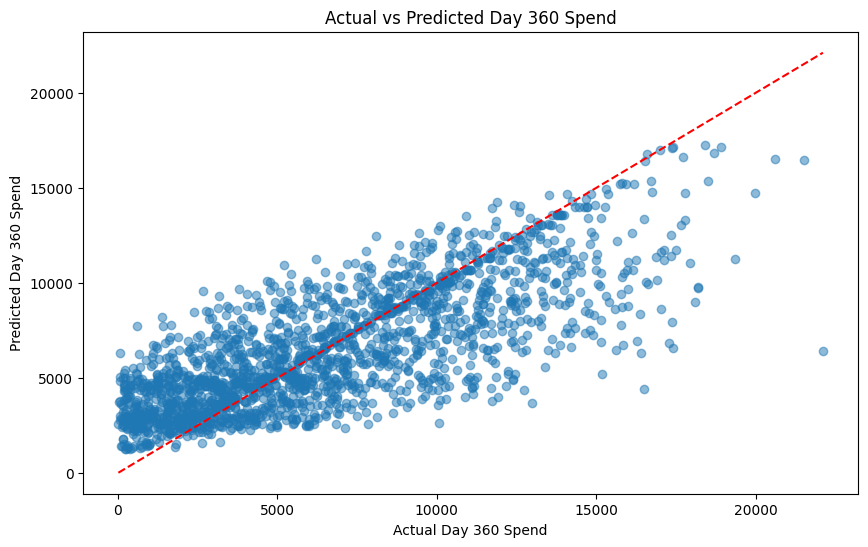

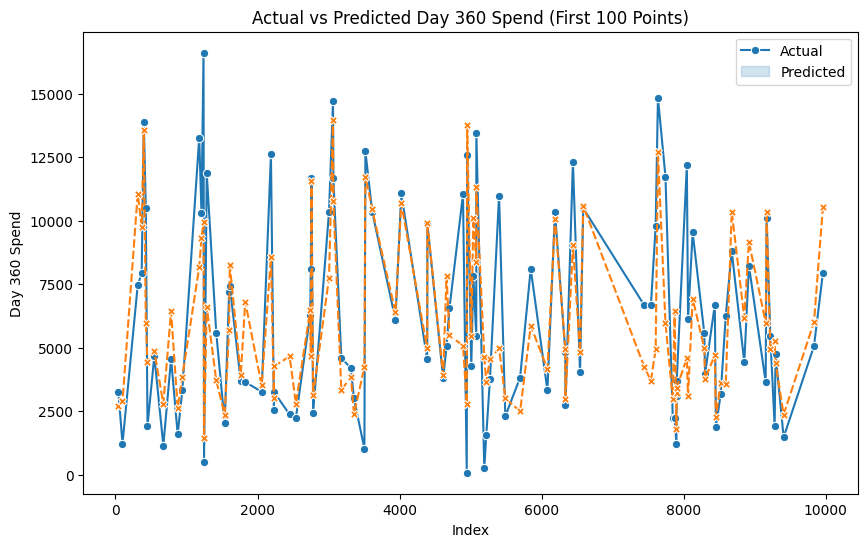

In [74]:
# Predict on the test data
y_pred = final_model.predict(X_test)

# Create a DataFrame for comparison
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], alpha=0.5)
plt.plot([comparison_df['Actual'].min(), comparison_df['Actual'].max()], 
         [comparison_df['Actual'].min(), comparison_df['Actual'].max()], 'r--')
plt.xlabel('Actual Day 360 Spend')
plt.ylabel('Predicted Day 360 Spend')
plt.title('Actual vs Predicted Day 360 Spend')
plt.show()

# Line plot for actual vs predicted
plt.figure(figsize=(10, 6))
sns.lineplot(data=comparison_df.head(100), markers=True)
plt.xlabel('Index')
plt.ylabel('Day 360 Spend')
plt.title('Actual vs Predicted Day 360 Spend (First 100 Points)')
plt.legend(['Actual', 'Predicted'])
plt.show()

### Conclusion and hypothetical impacts to business

* Identifying High-Value Customers: The model accurately predicts high-value customers early in their lifecycle, allowing the company to target these customers with personalized marketing efforts and retention strategies. The average day_360_spend for the dataset is approximately $6396.49. High-value customers are top 25% of 9810 customers ≈ 2452 customers. The 75th percentile of day_360_spend is approximately $9495.99.
    *  Assuming a modest increase of 5% in day_360_spend for high-value customers:
    * Additional spend per customer = $9495.99 * 5% = $474.80
    * Additional revenue from high-value customers = 2452 * $474.80 ≈ $1,164,749.60

* Improved Customer Insights: Personalized campaigns based on customer insights can increase the average order value by 5%, translating to a total revenue increase of approximately $5,533,669.20.
Enhancing customer engagement and satisfaction through targeted campaigns can foster a more loyal customer base.
    * Revenue Growth: Assuming a modest increase in customer lifetime value by 5% can lead to a revenue boost of approximately $3,135,544.20.
    * Current average day_360_spend = $6396.49.
    * New average day_360_spend = $6396.49 * 1.05 = $6716.31.
    * Increase per customer = $6716.31 - $6396.49 = $319.82.
    * Total revenue increase = 9810 customers * $319.82 ≈ $3,135,544.20.

Total Financial Impact: $1,164,749.60 + $5,533,669.20 + $3,135,544.20 = $9,833,963. 

The implementation of this predictive model is estimated to result in a total revenue impact of approximately $9,833,963. This significant financial benefit underscores the value of leveraging data-driven strategies for customer retention, marketing efficiency, and overall business growth.
